<a href="https://colab.research.google.com/github/aadarsh73/MachineLearning/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
columns = data.columns.tolist()

In [ ]:
columns.remove('Outcome')

In [ ]:
target="Outcome"

In [ ]:
X = data[columns]

In [ ]:
Y = data[target]

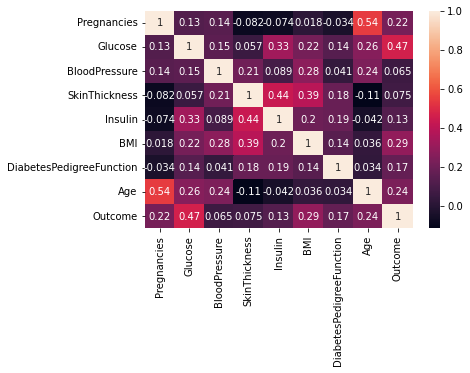

In [ ]:
sns.heatmap(data.corr(), annot = True)
plt.show()

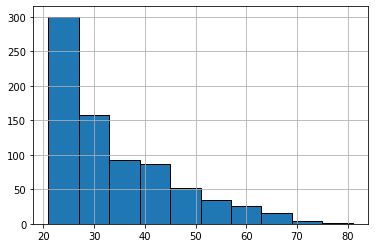

In [ ]:
data["Age"].hist(edgecolor = "black");

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_t_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_scaled, y_train)


LogisticRegression()

In [ ]:
model.score(X_scaled, y_train)

0.7703583061889251

In [ ]:
model.score(X_t_scaled, y_test)

0.7857142857142857

In [ ]:
count_classes = pd.value_counts(data[target], sort=True)
count_classes

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:

positive = data[data[target]==1]
negative = data[data[target]==0]

In [ ]:
negative.shape

(500, 9)

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE


In [ ]:
nm = NearMiss()
sm = SMOTE()
X_under, y_under = nm.fit_resample(X,Y)
X_over, y_over = sm.fit_resample(X,Y)

In [ ]:
print(X_over.isnull().values.any())
print(y_over.isnull().values.any())
columns =X_over.columns

for i in columns :
  for j in columns :
    if(i!=j):
      corr = X_over[i].corr(X_over[j])
      if corr>0.8:
        print(i,j,corr)
        print("\n")

False
False


In [ ]:
print(y_under.isnull().values.any())
print(X_under.isnull().values.any())
columns =X_under.columns

for i in columns :
  for j in columns :
    if(i!=j):
      corr = X_under[i].corr(X_under[j])
      if corr>0.8:
        print(i,j,corr)
        print("\n")

False
False


In [ ]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.2, random_state=42)

In [ ]:

scaler = StandardScaler().fit(X_train_under)
X_under_scaled = scaler.transform(X_train_under)
model = LogisticRegression()
model.fit(X_under_scaled, y_train_under)

LogisticRegression()

In [ ]:
X_under_stest = scaler.transform(X_test_under)

In [ ]:
predictions = model.predict(X_under_stest)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
c_matrix = confusion_matrix(y_test_under,predictions)
print(c_matrix)

[[41 18]
 [11 38]]


In [ ]:
print(f"Accuracy : {accuracy_score(y_test_under,predictions)}")
print(f"Precision: {precision_score(y_test_under,predictions)}")
print(f"Recall Score : {recall_score(y_test_under,predictions)}")
print(f"F1 Score : {f1_score(y_test_under,predictions)}")

Accuracy : 0.7314814814814815
Precision: 0.6785714285714286
Recall Score : 0.7755102040816326
F1 Score : 0.7238095238095238


In [ ]:
model.score(X_under_stest, y_test_under)

0.7314814814814815

In [ ]:
model.score(X_under_scaled, y_train_under)

0.7546728971962616

In [ ]:
scaler = StandardScaler().fit(X_train_under)
X_over_scaled = scaler.transform(X_train_over)
model = LogisticRegression()
model.fit(X_over_scaled, y_train_over)

LogisticRegression()

In [ ]:
X_over_stest = scaler.transform(X_test_over)

In [ ]:
predictions_over = model.predict(X_over_stest)

In [ ]:
print(f"Accuracy : {accuracy_score(y_test_over,predictions_over)}")
print(f"Precision: {precision_score(y_test_over,predictions_over)}")
print(f"Recall Score : {recall_score(y_test_over,predictions_over)}")
print(f"F1 Score : {f1_score(y_test_over,predictions_over)}")

Accuracy : 0.735
Precision: 0.7448979591836735
Recall Score : 0.7227722772277227
F1 Score : 0.7336683417085428


In [ ]:
model.score(X_over_stest, y_test_over)

0.735

In [ ]:
model.score(X_over_scaled, y_train_over)

0.74875

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.731272 (0.032036)
KNN: 0.655311 (0.101205)
CART: 0.645912 (0.066643)
RF: 0.725926 (0.077972)
SVM: 0.542697 (0.041578)
XGB: 0.723969 (0.081100)
LightGBM: 0.685045 (0.074323)


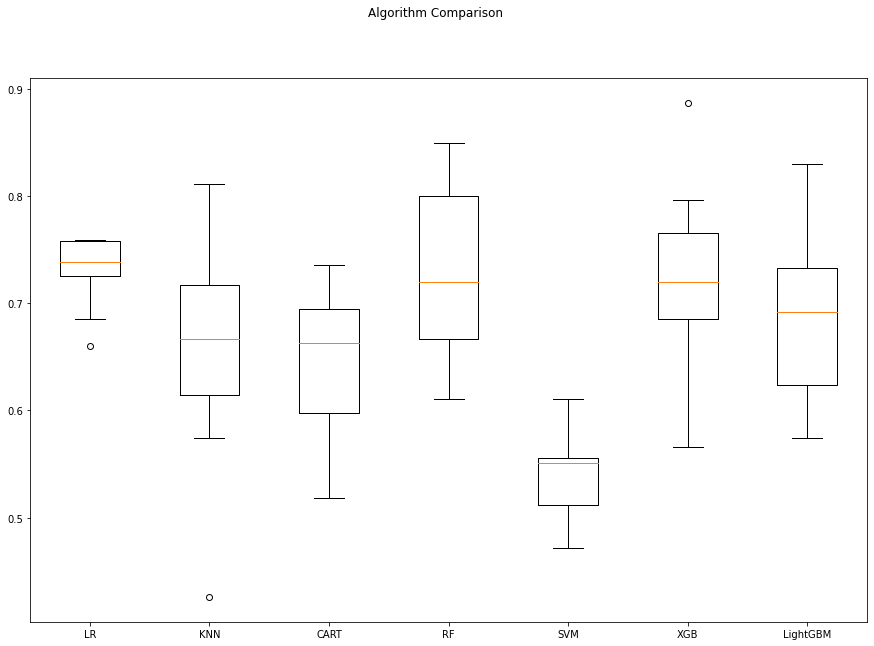

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, shuffle=True)
        
        cv_results = cross_val_score(model, X_under, y_under, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()